In [2]:
#Run this twice
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12, 9)
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style("whitegrid")
sns.set_context("poster")
sns.set_palette("bright")
from IPython.display import Markdown


In [3]:
from bokeh.core.properties import value
#from bokeh.io import show, output_file
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import Legend, LinearAxis, ColumnDataSource, HoverTool

In [4]:
notas = pd.read_excel("/home/rafael/Dropbox/Clases/Monterroso/2_ESO/2E-H.xlsx", sheet_name="Examen_1_T_1").dropna()

In [5]:
notas.iloc[:,1:8] = notas.iloc[:,1:8]/np.array([6,12, 8, 15, 12, 9, 10])*10

In [6]:
num_ejercicios=7
ejercicio_aprobado = 5

In [7]:
notas_ejercicios = pd.DataFrame()
for i in range(1,num_ejercicios+1):
    temp = pd.DataFrame()
    temp = pd.concat([temp, notas.iloc[:,i]], axis=0).assign(Ejercicio="Ej_"+str(i))
    temp = pd.concat([temp, notas.iloc[:,-1]], axis=1) 
    notas_ejercicios = pd.concat([notas_ejercicios, temp], ignore_index=True, axis=0)
notas_ejercicios = notas_ejercicios.rename(index=str, columns={0: "Nota", "Ejercicio": "Ejercicio", "Aprobado":"Aprobado"})
# nuevo = notas_ejercicios.astype({"Nota":"int64"})

In [8]:
notas_ejercicios["Ejercicio_Aprobado"] = notas_ejercicios["Nota"] >= ejercicio_aprobado

# Estadística Descriptiva
## Aprobados y suspensos: ¿cuántos hay de cada?

In [9]:
#notas["Aprueba"] = notas.apply(lambda row: "Sí" if(row["Aprobado"]==1) else "No", axis=1)
#notas.iloc[:,-2] = notas.iloc[:,-2].str.replace(',', '.').astype("float") 
aprobados = notas[notas["Aprobado"]==1]
suspensos = notas[notas["Aprobado"]==0]

In [10]:
num_aprobados = aprobados.shape[0]
num_suspensos = suspensos.shape[0]

In [11]:
Markdown("""
 **Hay {num_aprobados} aprobados y {num_suspensos} suspensos**
""".format(num_aprobados=num_aprobados, num_suspensos=num_suspensos))


 **Hay 9 aprobados y 18 suspensos**


In [12]:
Markdown("""
**La mayor nota de la clase es {mayor:.2f} y la menor es {menor:.2f}. De los aprobados, la menor es {menor_a:.2f} y de los suspensos la mayor es {mayor_s:.2f}**
""".format(mayor=notas.iloc[:,-2].max(), menor=notas.iloc[:,-2].min(), menor_a=aprobados.iloc[:,-2].min(), mayor_s=suspensos.iloc[:,-2].max()))


**La mayor nota de la clase es 9.65 y la menor es 0.56. De los aprobados, la menor es 5.00 y de los suspensos la mayor es 4.79**


In [13]:
def format_graph(p, x_label, legend, y_label="Estudiantes"):
    p.xaxis.axis_label= x_label
    p.xaxis.axis_label_text_font_size = "25pt"
    p.xaxis.major_label_text_font_size = "25pt"
    p.xaxis.axis_label_text_font = "times"
    p.xaxis.axis_label_text_color = "black"
    ## y Axis
    p.yaxis.axis_label=y_label
    p.yaxis.axis_label_text_font_size = "25pt"
    p.yaxis.major_label_text_font_size = "25pt"
    p.yaxis.axis_label_text_font = "times"
    p.yaxis.axis_label_text_color = "black"
    ##
    p.y_range.start = 0
    p.x_range.range_padding = 0.1
    p.xgrid.grid_line_color = None
    p.axis.minor_tick_line_color = None
    p.outline_line_color = None
    # Legend
    if legend:
     p.legend.label_text_font_size = "19pt"
     p.legend.location = "top_left"
     p.legend.orientation = "horizontal"
    # Title
    p.title.text_font_size="21pt"
    return p

In [14]:
#output_file("bar_stacked.html")
output_notebook(hide_banner=True)
labels = ["Suspensos", "Aprobados"]
colors = ["#ff7c00", "#023eff"]

data = {'labels' : labels,
        'resultados'   : [num_suspensos, num_aprobados],
        'colores' : colors
       }

TOOLTIPS="""
        <div>
            <span style="font-size: 17px; font-weight: bold;">@labels: @resultados</span>
        </div>  """
p = figure(x_range=labels, plot_height=650, plot_width=850, title="Aprobados Totales",
           toolbar_location=None, tools="hover", tooltips=TOOLTIPS)
# Axis Format
## x Axis
p.vbar(x='labels', top='resultados', width=0.9, fill_color='colores', source=data)
p = format_graph(p, "Resultados", False)
show(p)

**Veamos cómo se han distribuido las notas.**

In [15]:
#output_file("bar_stacked.html")
output_notebook(hide_banner=True)
num_students = len(notas.iloc[:,1])
labels = [str(x) for x in range(1, num_students+1)]
notas_sorted = notas.sort_values(notas.columns[-2]).iloc[:,-2]
data = {'labels' : labels,
        'resultados'   : notas_sorted,
       }

TOOLTIPS="""
        <div>
            <span style="font-size: 17px; font-weight: bold;">Nota: <span style="color:blue; font-size: 20px">@resultados</span></span>
        </div>  """
p = figure(x_range=labels, plot_height=650, plot_width=850, title="Notas de la clase",
           toolbar_location=None, tools="hover", tooltips=TOOLTIPS)
# Axis Format
## x Axis
p.vbar(x='labels', top='resultados', width=0.9, source=data)
p = format_graph(p, "Estudiantes Ordenados por Nota", False)
p.xaxis.major_label_text_font_size = "12pt"
x = np.linspace(0, num_students, 4)
y= np.full(4, 5)
p.line(x,y, line_width=4, color="red")
show(p)

In [16]:
hist, edges = np.histogram(notas.iloc[:,-2], density=False, bins=10)
edges = np.array([0,1,2,3,4,5,6,7,8,9,10])

In [17]:
output_notebook(hide_banner=True)
data = {'alumnos' :  hist}
source = ColumnDataSource( dict(data = hist, top=hist, left=edges[:-1], right=edges[1:] ))
TOOLTIPS="""
         <div>
            <span style="font-size: 17px; font-weight: bold;"><span style="color:blue">Alumnos</span>: @data</span>
        </div>  """
p = figure(title="Histograma de Notas", plot_height=650, plot_width=850,
           tools="hover", tooltips=TOOLTIPS, background_fill_color="#fafafa")
p.quad(top="top", bottom=0, left="left", right="right",
           fill_color="#023eff", line_color="white", source=source)
# Line
x= np.full(4, 5)
y = np.linspace(0, hist.max(), 4)
p.line(x,y, line_width=4, color="red")
p = format_graph(p, "Resultados", False)
show(p)

**Vamos a sacar algunos valores descriptivos de cómo han ido los ejercicios**

### Total de ejercicios aprobados (naranja) y suspensos (azul) por cada uno de los ejercicios.

In [18]:
#output_file("bar_stacked.html")
output_notebook(hide_banner=True)
notas_unstack=notas_ejercicios.groupby(['Ejercicio', 'Ejercicio_Aprobado']).size().unstack()
nombres_ejercicios = list(notas.columns.values)[1:num_ejercicios+1]
ejercicios = nombres_ejercicios
years = ["Suspensos", "Aprobados"]
colors = ["#ff7c00", "#023eff"]

data = {'ejercicios' : ejercicios,
        'Suspensos'   : list(notas_unstack[0]),
        'Aprobados'   : list(notas_unstack[1])
       }

TOOLTIPS="""
        <div>
            <span style="font-size: 17px; font-weight: bold;"><span style="color: blue">$name @ejercicios</span>: @$name</span>
        </div>  """
p = figure(x_range=ejercicios, plot_height=650, plot_width=850, title="Aprobados por Ejercicio",
           toolbar_location=None, tools="hover", tooltips=TOOLTIPS)

##
p.vbar_stack(years, x='ejercicios', width=0.9, color=colors, source=data,
             legend=[value(x) for x in years])
p = format_graph(p, "Ejercicios", False)
show(p)

### Mediana de cada uno de los ejercicios

In [19]:
#output_file("bar_stacked.html")
output_notebook(hide_banner=True)
num_students = len(notas.iloc[:,1])
medianas = list(notas.iloc[:,1:num_ejercicios+2].median(axis=0)[:-1])
data = {'labels' : nombres_ejercicios,
        'resultados'   : medianas,
       }

TOOLTIPS="""
        <div>
            <span style="font-size: 17px; font-weight: bold;">@labels: @resultados</span>
        </div>  """
p = figure(x_range=nombres_ejercicios, plot_height=650, plot_width=850, title="Medianas de los ejercicios",
           toolbar_location=None, tools="hover", tooltips=TOOLTIPS)
# Axis Format
## x Axis
p.line(x=nombres_ejercicios, y=np.full(len(nombres_ejercicios), ejercicio_aprobado), line_width=4, color="red")
p.line('labels','resultados', line_width=4, color="#023eff", source=data)
p = format_graph(p, "Ejercicios", False, "Mediana")
p.y_range.end = ejercicio_aprobado*2
show(p)

### Media de cada uno de los ejercicios

In [20]:
#output_file("bar_stacked.html")
output_notebook(hide_banner=True)
num_students = len(notas.iloc[:,1])
mean = list(notas.iloc[:,1:num_ejercicios+2].mean(axis=0)[:-1])
data = {'labels' : nombres_ejercicios,
        'resultados'   : mean,
       }

TOOLTIPS="""
        <div>
            <span style="font-size: 17px; font-weight: bold;">@labels: @resultados</span>
        </div>  """
p = figure(x_range=nombres_ejercicios, plot_height=650, plot_width=850, title="Medias de los ejercicios",
           toolbar_location=None, tools="hover", tooltips=TOOLTIPS)
# Axis Format
## x Axis
p.line(x=nombres_ejercicios, y=np.full(len(nombres_ejercicios), ejercicio_aprobado), line_width=4, color="red")
p.line('labels','resultados', line_width=4, color="#023eff", source=data)
p = format_graph(p, "Ejercicios", False, "Mediana")
p.y_range.end = ejercicio_aprobado*2
show(p)

### Histograma por ejercicio

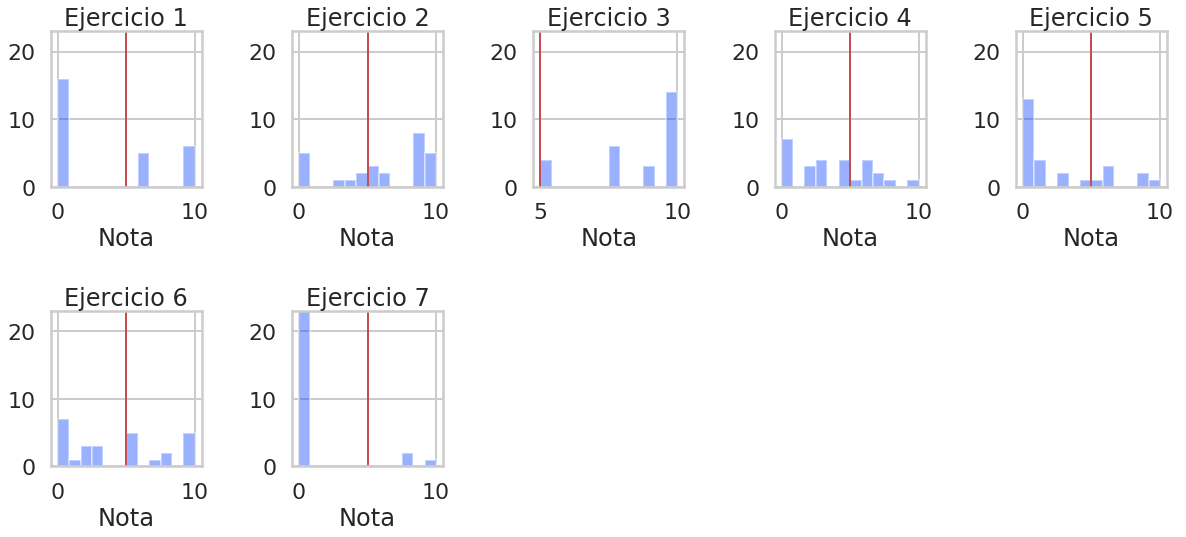

In [21]:
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(hspace=0.8, wspace=0.6)
for i in range(1,num_ejercicios+1):
    fig.add_subplot(2,5,i)
    ax= sns.distplot(notas.iloc[:,i], bins=12, kde=False)
    plt.axvline(linewidth=2, color='r', x= ejercicio_aprobado)
    ax.set_xlabel("Nota")
    ax.set_title("Ejercicio " + str(i))
    ax.set_ylim([0,23])

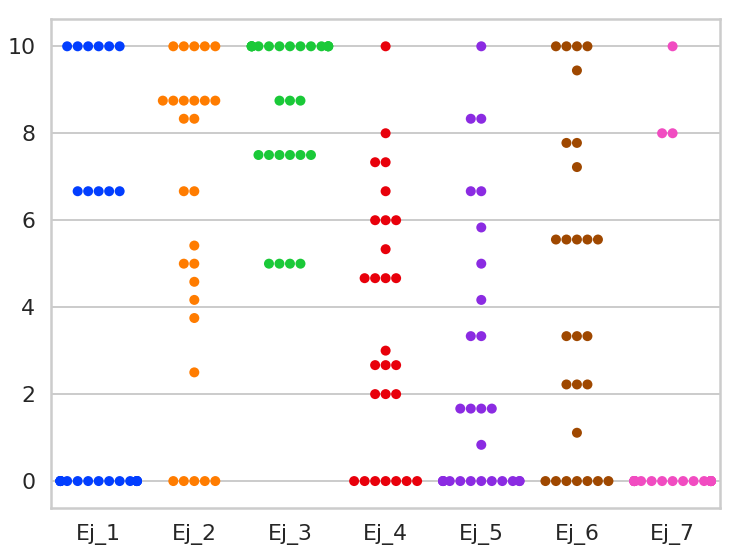

In [22]:
sns.swarmplot(data=notas.iloc[:,1:num_ejercicios+1], size=10)

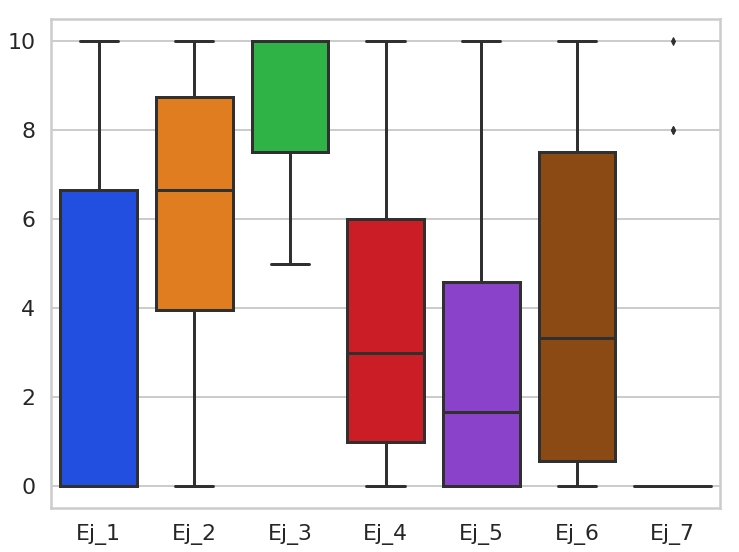

In [23]:
sns.boxplot(data=notas.iloc[:,1:num_ejercicios+1])
#sns.plot(data=notas.iloc[:,1:num_ejercicios+1])

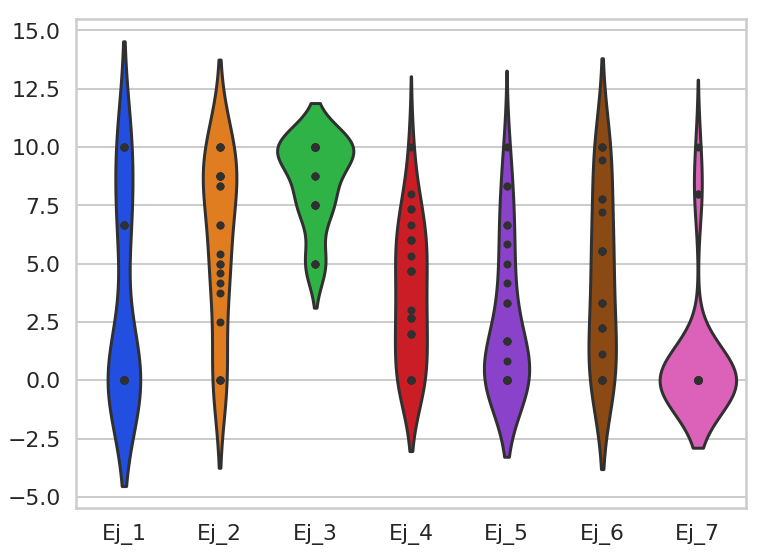

In [24]:
ax = sns.violinplot(data=notas.iloc[:,1:num_ejercicios+1], inner="points")
#ax.set(ylim=(0,12))

## Separación en dos clases: suspensos y aprobados

### Medias de cada ejercicio sepando los aprobados de los suspensos 

In [25]:
print("Medias aprobados:\n{}".format(aprobados.iloc[:,1:num_ejercicios+2].mean(axis=0)))
print(" ")
print("Medias suspensos:\n{}".format(suspensos.iloc[:,1:num_ejercicios+2].mean(axis=0)))

Medias aprobados:
Ej_1       8.148148
Ej_2       9.351852
Ej_3       9.305556
Ej_4       6.111111
Ej_5       5.555556
Ej_6       6.234568
Ej_7       2.888889
Not_72    47.888889
dtype: float64
 
Medias suspensos:
Ej_1       1.111111
Ej_2       4.375000
Ej_3       8.194444
Ej_4       2.407407
Ej_5       1.064815
Ej_6       3.425926
Ej_7       0.000000
Not_72    20.444444
dtype: float64


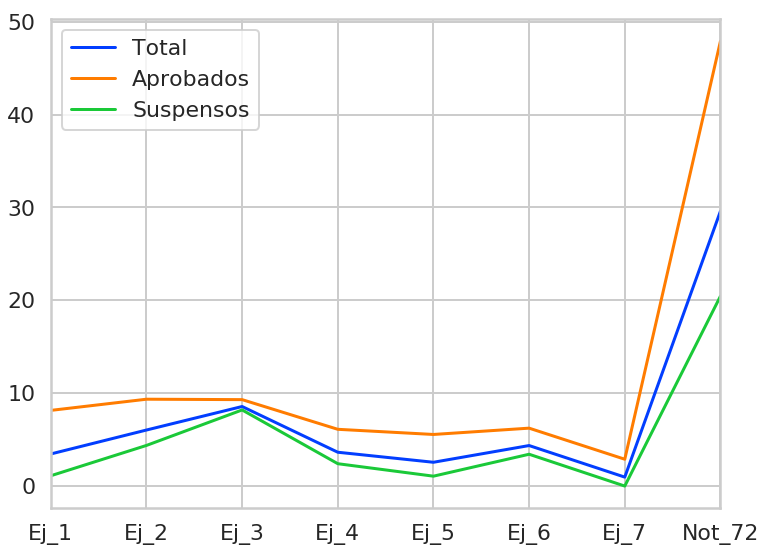

In [26]:
notas.iloc[:,1:num_ejercicios+2].mean(axis=0).plot()
aprobados.iloc[:,1:num_ejercicios+2].mean(axis=0).plot()
suspensos.iloc[:,1:num_ejercicios+2].mean(axis=0).plot()
plt.legend(["Total", "Aprobados", "Suspensos"])
plt.show()

### Gráficas swarm y de cajas para cada uno de los ejercicios separando los aprobados de los suspensos 

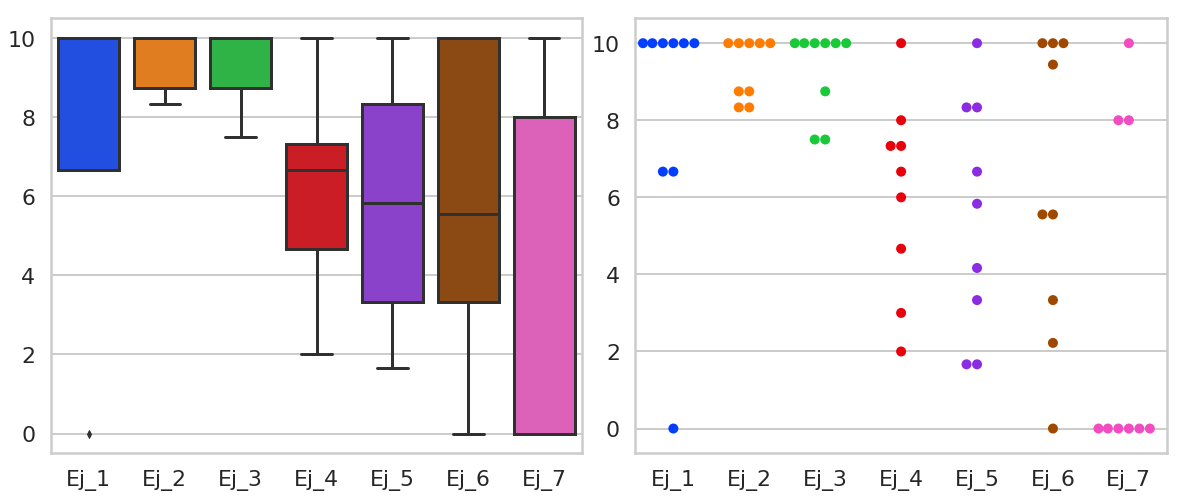

In [27]:
#with sns.axes_style("whitegrid"):
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(hspace=0.8, wspace=0.1)
fig.add_subplot(1,2,1)
sns.boxplot(data=aprobados.iloc[:,1:num_ejercicios+1])
fig.add_subplot(1,2,2)
ax = sns.swarmplot(data=aprobados.iloc[:,1:num_ejercicios+1], size=10)
    

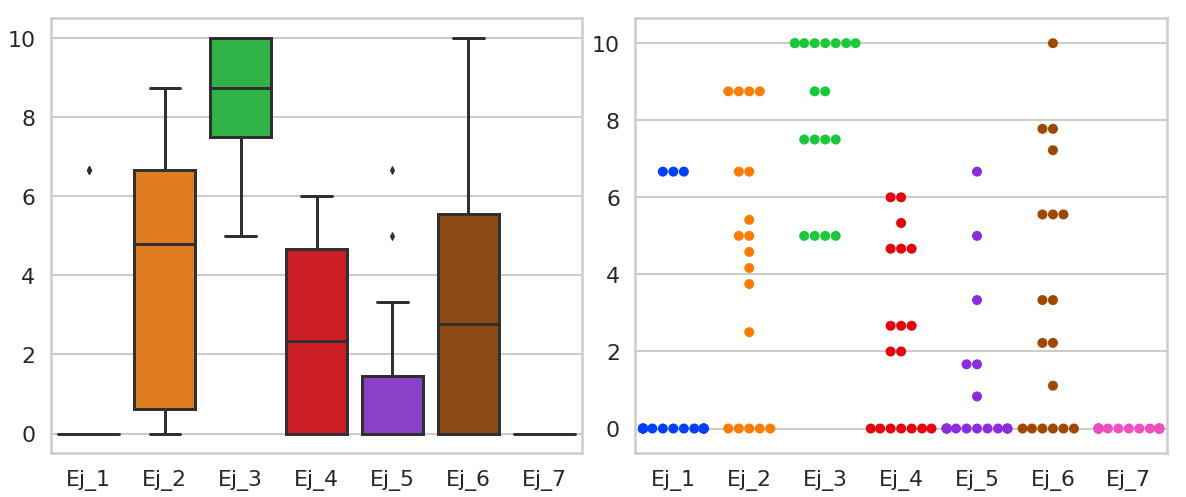

In [28]:
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(hspace=0.8, wspace=0.1)
fig.add_subplot(1,2,1)
sns.boxplot(data=suspensos.iloc[:,1:num_ejercicios+1])
fig.add_subplot(1,2,2)
ax = sns.swarmplot(data=suspensos.iloc[:,1:num_ejercicios+1], size=10)

### Comparativa de las gráficas de violín de cada uno de los ejercicios entre aprobados y suspensos 

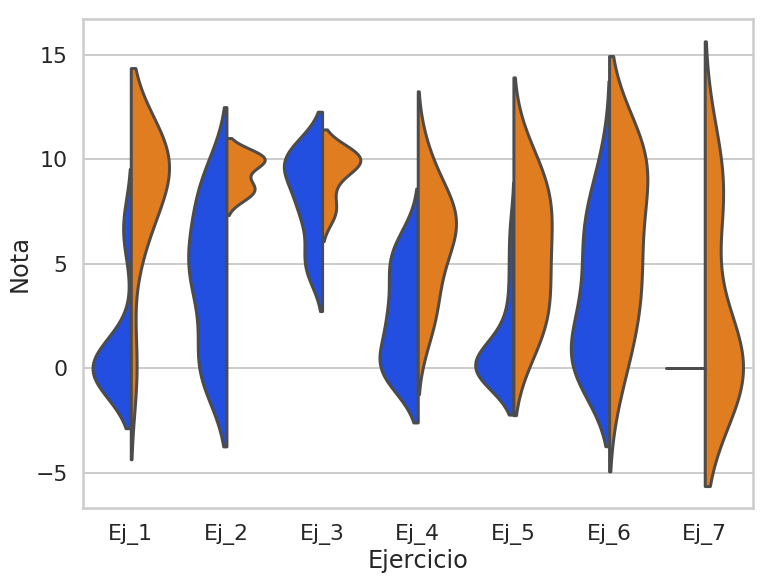

In [29]:
ax = sns.violinplot(x="Ejercicio", y="Nota", hue="Aprobado", inner=None,
               split=True, scale="width",
               data=notas_ejercicios)
ax.legend_.remove()
plt.show()